# ✨Bienvenidos✨ <img src="https://raw.githubusercontent.com/cgiohidalgo/JupyterHub-nbgrader/main/logo.png" alt="udenar" width="180"/>
<div style="text-align: center"> MODULO DE ANALÍTICA DE DATOS</div>
<div style="text-align: center"> Maestría de Ingeniería de Sistemas y Computación </div>
 <div style="text-align: center">Victor Bucheli (victor.bucheli@correounivalle.edu.co) - Giovanny Hidalgo (carlos.hidalgo@correounivalle.edu.co)
</div>


## _Proyecto Final Analitica de Datos..._

- Presentado por: Sandra Marcela Guerrero Calvache, Juan David Delgado, Wilmer Escobar.



## Modelos de Analitica de Datos: Naive Bayes

El dataset se compone de 657 registros de 5 cursos de A&G que se dictaron en el año 2019 cohorte II, los cuales pertenecen a cinco programas de la Facultad de Ingeniería de la Universidad del Valle





# Clasificador Naive Bayes 

Los modelos Naive Bayes son un grupo de algoritmos de clasificación extremadamente rápidos y simples que a menudo son adecuados para conjuntos de datos de muy alta dimensión. Debido a que son tan rápidos y tienen  pocos parámetros ajustables, terminan siendo muy útiles como una línea de base para un problema de clasificación. 

- Funciona bien en el caso de variables de entrada categóricas comparada con variables numéricas

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score, roc_curve


In [2]:
#Carga los datos provenientes de un csv
datos = pd.read_csv("estudiantes_final.csv", sep=',')

In [3]:
datos

,Error1,Error2,Error3,Aceptado,Parcial1,Parcial2,Final,Tiempo,GanaCurso,Entregas
0,3.0,1.0,0.0,2,3.00,3.000,3.0000,48.97,1,6.0
1,2.0,0.0,1.0,2,4.58,3.788,4.1840,20.35,1,5.0
2,4.0,1.0,0.0,1,3.20,2.877,3.0385,56.01,1,6.0
3,4.0,2.0,0.0,2,4.15,4.008,4.0790,66.62,1,8.0
4,4.0,2.0,0.0,1,3.13,2.827,2.9785,69.71,0,7.0
...,...,...,...,...,...,...,...,...,...,...
652,6.0,3.0,2.0,2,4.00,4.850,4.4242,63.16,1,13.0
653,3.0,1.0,0.0,2,3.08,3.470,3.2775,35.11,1,6.0
654,1.0,1.0,1.0,2,3.92,3.950,3.9360,21.39,1,5.0
655,6.0,3.0,2.0,2,4.68,3.040,3.8613,24.07,1,13.0


# Exploración de datos 

In [4]:
datos['GanaCurso'].unique()

array([1, 0])

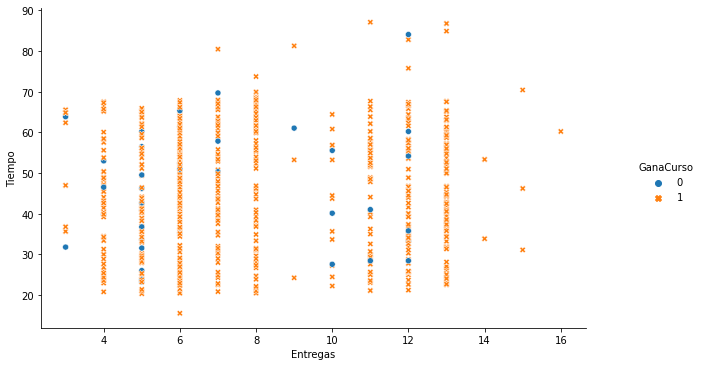

In [7]:
g=sns.relplot(x='Entregas',y='Tiempo',data=datos,hue='GanaCurso',style='GanaCurso')
g.fig.set_size_inches(10,5)
plt.show()

/home/sandra.guerrero/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


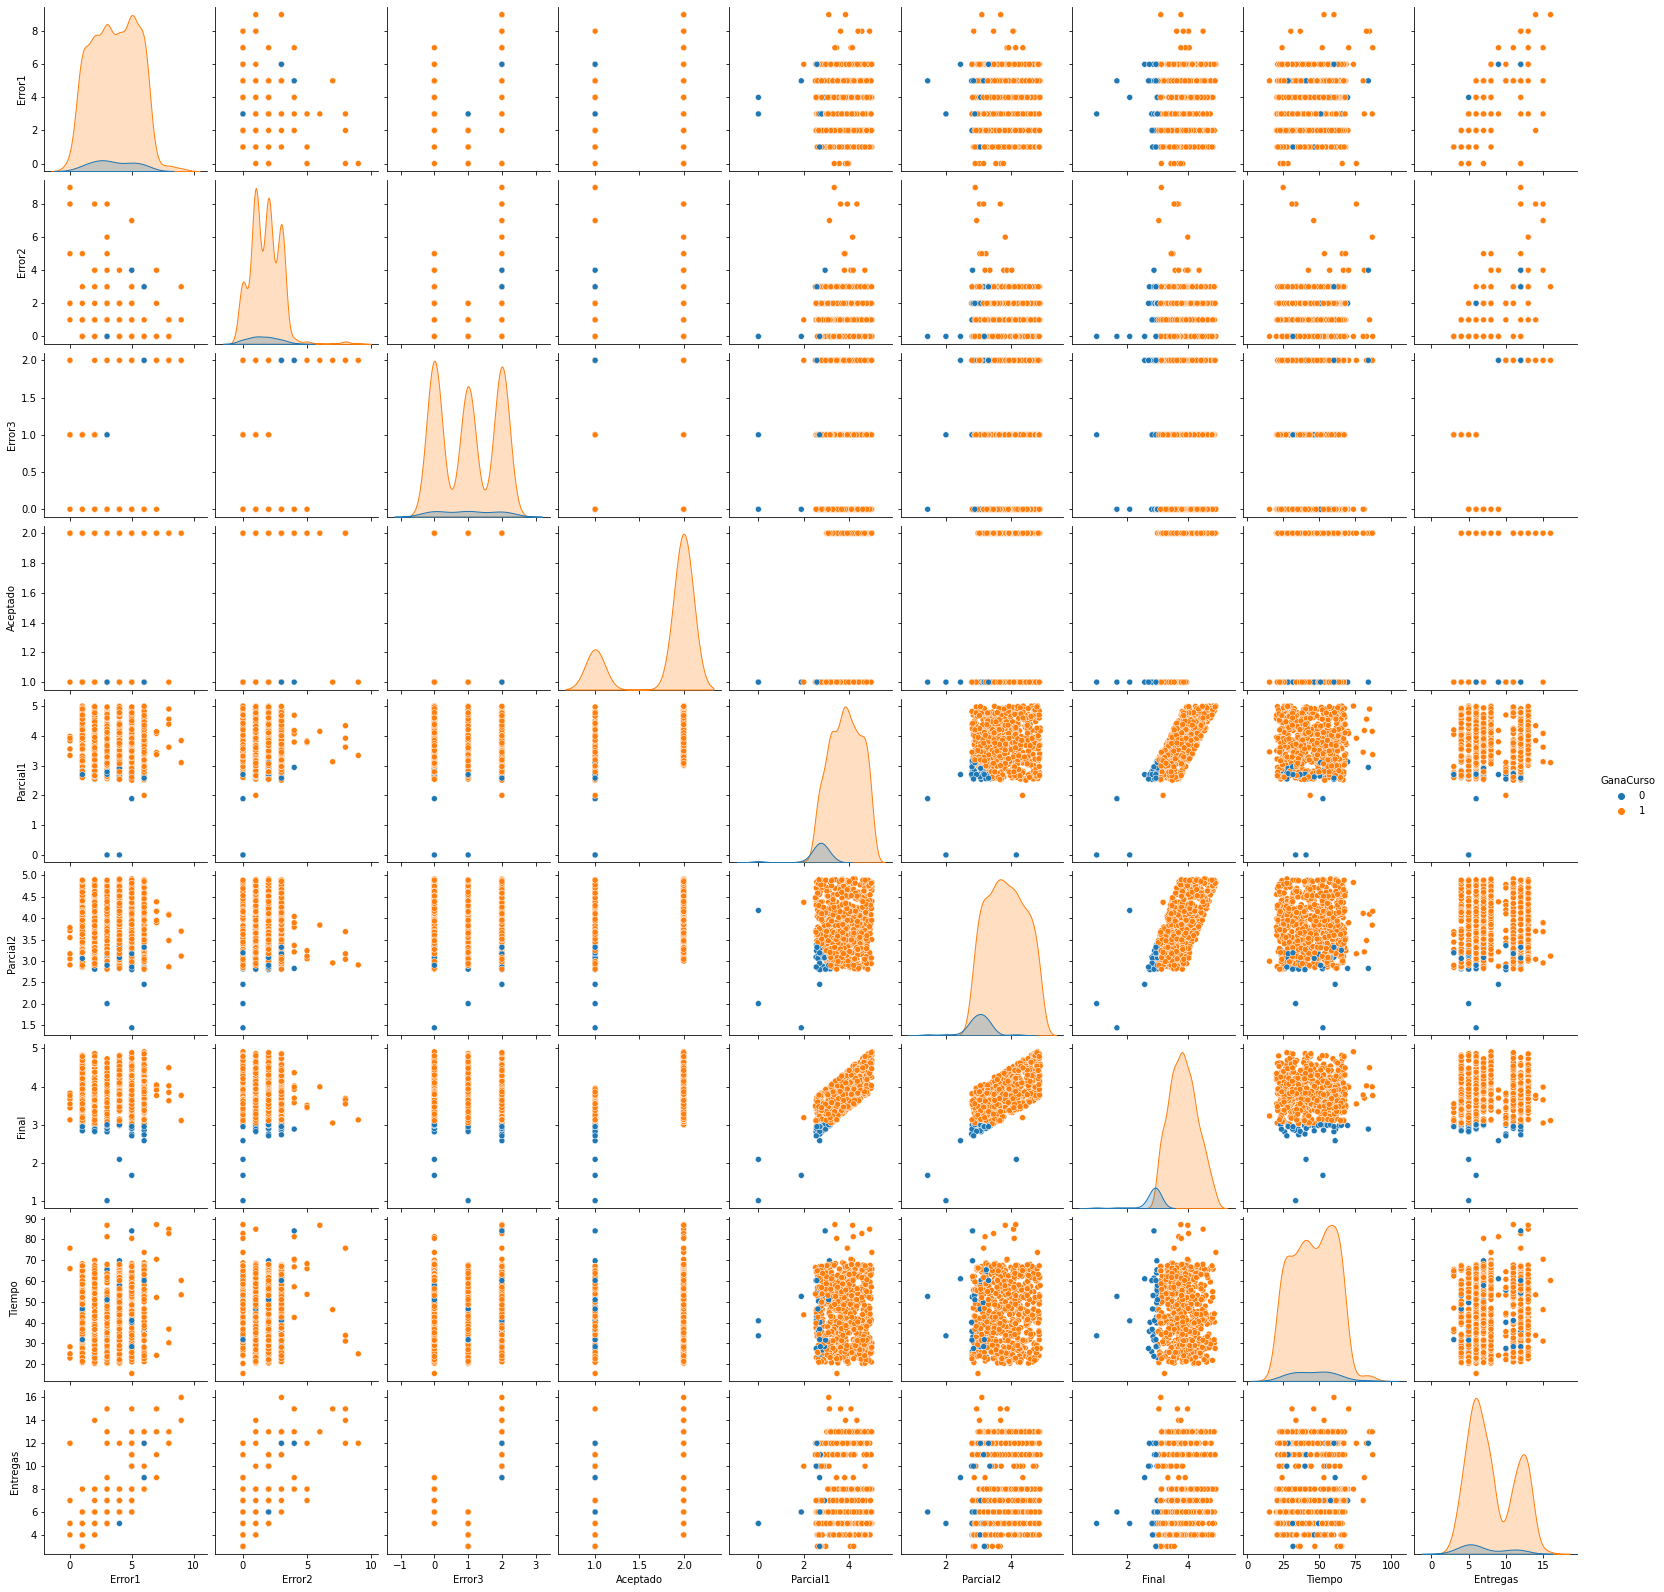

In [6]:
sns.pairplot(datos,hue="GanaCurso")
plt.show()


# Ahora dividamos los datos en un conjunto de entrenamiento y validación.

In [17]:
train, test = train_test_split(datos, test_size=0.2)

In [18]:
X_train = train[['Error1', 'Error2', 'Error3', 'Aceptado', 'Parcial1', 'Parcial2','Tiempo']]
y_train=train.GanaCurso
X_test= test[['Error1', 'Error2', 'Error3', 'Aceptado', 'Parcial1', 'Parcial2','Tiempo']] 
y_test =test.GanaCurso 

# Modelo Naive Bayes 

In [19]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Métricas de diagnóstico


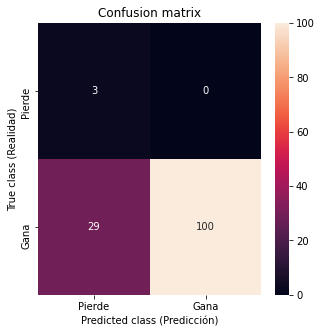

In [20]:
LABELS = ["Pierde", "Gana"]
def mostrar_resultados(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class (Realidad)')
    plt.xlabel('Predicted class (Predicción)')
    plt.show()
    #print (classification_report(y_test, y_pred))

y_pred = modelo.predict(X_test)
mostrar_resultados(y_test, y_pred)

In [21]:
accuracy_nb=round(accuracy_score(y_test,y_pred)* 100, 2)
acc_gaussian = round(modelo.score(X_train, y_train) * 100, 2)

accuracy = accuracy_score(y_test,y_pred)

print(classification_report(y_test, y_pred))

print('accuracy_Naive Bayes: %.1f' %accuracy)

              precision    recall  f1-score   support

           0       0.09      1.00      0.17         3
           1       1.00      0.78      0.87       129

    accuracy                           0.78       132
   macro avg       0.55      0.89      0.52       132
weighted avg       0.98      0.78      0.86       132

accuracy_Naive Bayes: 0.8


ROC SCORE:  0.8875968992248062


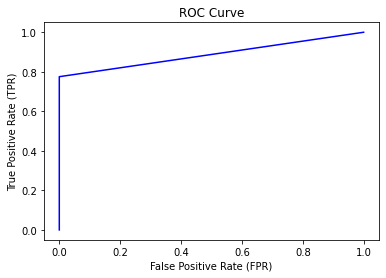

In [22]:
modeloroc = GaussianNB() #crear otro objeto del modelo DecisionTreeClassifier
modeloroc.fit(X_train,y_train) #hacer el fit para el nuevo modelo 
pred = modeloroc.predict(X_test) # predecir utiizando el dataset X_test
roc_score = roc_auc_score(y_test,pred) #  clauclar auc con n_samples, n_classes
print("ROC SCORE: ",roc_score)
fpr,tpr,threshold = roc_curve(y_test,pred)
plt.clf()
plt.plot(fpr,tpr, color='Blue', label='No Skill')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.show()

# Probar el modelo

In [23]:
#['Error1', 'Error2', 'Error3', 'Aceptado', 'Parcial1', 'Parcial2','Tiempo'] 
modelo.predict([[3,0,2,1,1,3,10]]) #correcto

array([0])

In [24]:
modelo.predict([[4,2,0,1,3.13,2.827,69.71]])


array([0])

In [25]:
modelo.predict([[0,0,9,2,2.5,2.9,2]])

array([1])

In [26]:
modelo.predict([[0,0,0,2,2.9,2.9,78]])

array([1])

In [27]:
modelo.predict([[5,0,0,1,1.89,1.446,52.59]])

array([0])

In [28]:
modelo.predict([[0,0,0,2,3,3,5.5]])

array([1])